# MONAI Airway Segmentation

In [79]:
import os
from glob import glob
import torch
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd,
    Resized,
)
from monai.data import Dataset, DataLoader
from monai.utils import first
import matplotlib.pyplot as plt

In [80]:
data_dir = "/home/jtabalon/rabbit_seg/sample_seg"

In [81]:
train_images = glob(os.path.join(data_dir, 'train_data', 'ct.nii'))
train_labels = glob(os.path.join(data_dir, "labels", "airway.nii"))
print(train_images, train_labels)

['/home/jtabalon/rabbit_seg/sample_seg/train_data/ct.nii'] ['/home/jtabalon/rabbit_seg/sample_seg/labels/airway.nii']


In [82]:
train_files = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

In [83]:
print(train_files)

[{'image': '/home/jtabalon/rabbit_seg/sample_seg/train_data/ct.nii', 'label': '/home/jtabalon/rabbit_seg/sample_seg/labels/airway.nii'}]


In [84]:
# load the images
# do any transforms
# need to convert into torch tensors

In [85]:
# load the images

train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 2)),
        ScaleIntensityRanged(keys='image', a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=['image', 'label'], source_key='image'),
        Resized(keys=['image', 'label'], spatial_size=[340, 340, 340]),
        ToTensord(keys=['image', 'label']),
    ]
)


In [86]:
train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

## Visualize First Patient

In [87]:
test_patient = first(train_loader)
print(test_patient)

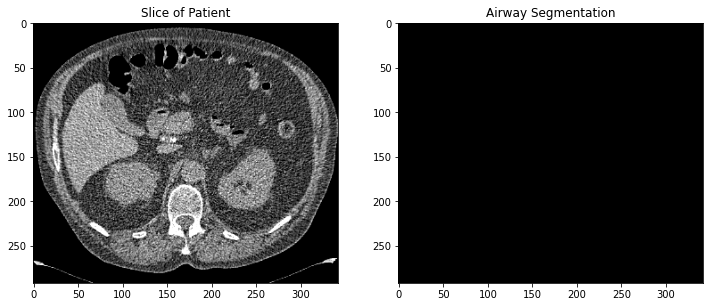

In [ ]:
plt.figure('test', (12, 6))


plt.subplot(1, 2, 1)
plt.title('Slice of Patient')
plt.imshow(test_patient['image'][0, 0, :, :, 30], cmap="gray")

plt.subplot(1, 2, 2)
plt.title('Airway Segmentation')
plt.imshow(test_patient['label'][0, 0, :, :, 30], cmap="gray")

plt.show()

In [67]:
# Find where - in a given slice - the number of 1s is the highest in order to find the mask of the lungs